In [1]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [4]:
sp.stats.binom_test(n, N) # accept

0.3437499999999999

In [5]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [6]:
sp.stats.binom_test(n, N)

0.9204107626128206

In [37]:
# 연습문제
N = 10
theta = 0.5
sp.stats.binom_test(2, N), sp.stats.binom_test(8, N)

(0.10937500000000003, 0.10937500000000003)

10번중 1번이하, 9번이상 나와야 fair하지 않다고 말할 수 있다.

In [40]:
N = 1000
theta = 0.5
sp.stats.binom_test(474, N), sp.stats.binom_test(526, N)

(0.10674954203435372, 0.10674954203435372)

1000번중 473번이하, 527번이상 나와야 fair하지 않다고 말할 수 있다.

##### N=10일때보다 N=1000일때  fair한 경우의 범위가 더 좁다.
##### N이 엄청 커지면 특정 값에 범위가 한정되면서 웬만하면 reject된다.

In [43]:
# 연습문제 3번
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [49]:
female = tips[tips["sex"] == "Female"]
f_df = female.groupby("smoker").size().reset_index()
f_df

,smoker,0
0,Yes,33
1,No,54


In [50]:
f_df["ratio"] = f_df[0] / f_df[0].sum()

In [51]:
f_df

,smoker,0,ratio
0,Yes,33,0.37931
1,No,54,0.62069


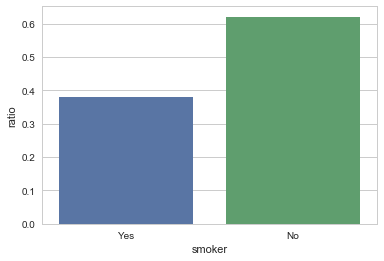

In [55]:
sns.barplot(x=f_df['smoker'], y=f_df['ratio'])
plt.show()

In [69]:
N = 87
theta = 0.62069
np.random.seed(0)
x = sp.stats.bernoulli(theta).rvs(N)
n = np.count_nonzero(x)
sp.stats.binom_test(n, N)

0.0024794197938160754

In [70]:
sp.stats.binom_test(54,87) # 그냥 한 줄이면됨..

0.031418110233846136

여자손님중에 비흡연자가 흡연자보다 많다고 말할 수 있다.

In [67]:
dinner = female[female["time"]=="Dinner"]
df2 = dinner.groupby("smoker").size().reset_index()
df2["ratio"] = df2[0] / df2[0].sum()
df2

,smoker,0,ratio
0,Yes,23,0.442308
1,No,29,0.557692


In [71]:
sp.stats.binom_test(29,52)

0.4884556693798922

저녁여자손님중에 비흡연자가 흡연자보다 많다고 말할 수 없다.